### GOAL
#### To predict departmentwide weekly sales of every store provided historical data of 45 Walmart Stores

## AIM
### Examine different model perfomances with insufficient data and sufficient data fed into them

### Loading modules to work with

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import datetime as dt

In [2]:
os.getcwd()

'C:\\Users\\Boniface\\Desktop\\pythonpractice\\DataScience\\notebooks'

### Importing our Data

In [3]:
features =pd.read_csv('datasets/walmart/features.csv')
sampleSubmission =pd.read_csv('datasets/walmart/sampleSubmission.csv')
test =pd.read_csv('datasets/walmart/test.csv')
train =pd.read_csv('datasets/walmart/train.csv')
stores =pd.read_csv('datasets/walmart/stores.csv')

#### Data Anaysis through Descriptive Statistics

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [6]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 11.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.3+ MB


In [7]:
# Descriptive Analytics
# features.columns.tolist()
# features.describe().keys().tolist #described columns to list
# features.count() # total number of values per column
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 679.9+ KB


In [8]:
features.iloc[-5:].Store #Accessing the last five stores
#features["IsHoliday"].replace([True,False],[1,0]) # replacing multiple elements
#features.rename(columns={"A" : "a", "B": "b"}) # renaming of columns

8185    45
8186    45
8187    45
8188    45
8189    45
Name: Store, dtype: int64

In [9]:
features.Store.nunique() # obtaining number of unique values

45

In [10]:
# We need to concatenate the train, test and features dataset for uniformity in categorical conversions and feature engineering
features_len = len(features)
train_len = len(train)
test_len = len(test)
dataset =  pd.concat(objs=[features,train,test], axis=0).reset_index(drop=True)


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544824 entries, 0 to 544823
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         544824 non-null  int64  
 1   Date          544824 non-null  object 
 2   Temperature   8190 non-null    float64
 3   Fuel_Price    8190 non-null    float64
 4   MarkDown1     4032 non-null    float64
 5   MarkDown2     2921 non-null    float64
 6   MarkDown3     3613 non-null    float64
 7   MarkDown4     3464 non-null    float64
 8   MarkDown5     4050 non-null    float64
 9   CPI           7605 non-null    float64
 10  Unemployment  7605 non-null    float64
 11  IsHoliday     544824 non-null  bool   
 12  Dept          536634 non-null  float64
 13  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(11), int64(1), object(1)
memory usage: 52.5+ MB


In [12]:
dataset.isnull().sum()

Store                0
Date                 0
Temperature     536634
Fuel_Price      536634
MarkDown1       540792
MarkDown2       541903
MarkDown3       541211
MarkDown4       541360
MarkDown5       540774
CPI             537219
Unemployment    537219
IsHoliday            0
Dept              8190
Weekly_Sales    123254
dtype: int64

In [13]:
# Droping Columns that have little importance on the overall model perfomance
# We drop Markdowns since data contained is anonymized and hence not useful
dataset.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1, inplace =True)

In [14]:
dataset.isnull().sum()

Store                0
Date                 0
Temperature     536634
Fuel_Price      536634
CPI             537219
Unemployment    537219
IsHoliday            0
Dept              8190
Weekly_Sales    123254
dtype: int64

In [15]:
# lets try find out which rows have Superbowl holidays .
dataset[(dataset.Date == '2010-02-12' ) | (dataset.Date == '2011-02-11') | (dataset.Date == '2012-02-10') | (dataset.Date == '2013-2-08')].count()

Store           9030
Date            9030
Temperature      135
Fuel_Price       135
CPI              135
Unemployment     135
IsHoliday       9030
Dept            8895
Weekly_Sales    8895
dtype: int64

In [16]:
# Replace the SuperBowl holidays with an S.Dates defined in Kaggle 
dataset.Date.replace(['2010-02-12','2011-02-11','2012-02-10','2013-2-08'],'S',inplace=True) # 2012-02-10 made S by mistake

In [17]:
dataset[dataset.Date=='S'].count()


Store           9030
Date            9030
Temperature      135
Fuel_Price       135
CPI              135
Unemployment     135
IsHoliday       9030
Dept            8895
Weekly_Sales    8895
dtype: int64

In [18]:
# Replace the Labour holidays with an L .Dates defined in Kaggle 
dataset.Date.replace(['2010-09-10','2011-09-09','2012-09-07','2013-09-06'],'L',inplace=True) 

In [19]:
dataset[dataset.Date=='L'].count()

Store           8996
Date            8996
Temperature      135
Fuel_Price       135
CPI              135
Unemployment     135
IsHoliday       8996
Dept            8861
Weekly_Sales    8861
dtype: int64

In [20]:
# Replace the Thanksgiving holidays with a T .Dates defined in Kaggle 
dataset.Date.replace(['2010-11-26','2011-11-25','2012-11-23','2013-11-29'],'T',inplace=True) 

In [21]:
dataset[dataset.Date=='T'].count()

Store           9070
Date            9070
Temperature      135
Fuel_Price       135
CPI              135
Unemployment     135
IsHoliday       9070
Dept            8935
Weekly_Sales    5959
dtype: int64

In [22]:
# Replace the Christmass holidays with a C .Dates defined in Kaggle 
dataset.Date.replace(['2010-12-31','2011-12-30','2012-12-28','2013-12-27'],'C',inplace=True) 

In [23]:
dataset[dataset.Date=='C'].count()

Store           9069
Date            9069
Temperature      135
Fuel_Price       135
CPI              135
Unemployment     135
IsHoliday       9069
Dept            8934
Weekly_Sales    5946
dtype: int64

In [24]:
# Replace the other date values with N for normal day
dataset.loc[dataset.Date.str.len() > 1,'Date'] = 'N'

In [25]:
dataset.Date.loc[-50:]

0         N
1         S
2         N
3         N
4         N
         ..
544819    N
544820    N
544821    N
544822    N
544823    N
Name: Date, Length: 544824, dtype: object

## Our Date is now in terms of S,L,C,T,N. We can normalize this values into 1 and zeros

In [26]:
# Replacinng Column names to lower case. Not essential
#dataset.rename(columns={"IsHoliday":"is_holiday","Fuel_Price":"fuel_price","Temperature":"temperature","CPI":"cpi","Unemployment":"unemployment","Date":"date","Store":"store","Dept":"dept","Weekly_Sales":"weekly_sales"}, inplace=True)


In [27]:
dataset.IsHoliday.isnull().sum()

0

In [28]:
# fill the missing Is_Holiday value with False, since it is the most prevalent value
dataset.IsHoliday= dataset.IsHoliday.fillna(False)

In [29]:
# Converting from boolean to int
dataset["IsHoliday"] = dataset["IsHoliday"].astype('int64')

In [30]:
dataset.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
IsHoliday         int64
Dept            float64
Weekly_Sales    float64
dtype: object

In [31]:
dataset.isnull().sum()

Store                0
Date                 0
Temperature     536634
Fuel_Price      536634
CPI             537219
Unemployment    537219
IsHoliday            0
Dept              8190
Weekly_Sales    123254
dtype: int64

In [32]:
train.Dept.head()

0    1
1    1
2    1
3    1
4    1
Name: Dept, dtype: int64

In [33]:
dataset.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
count,544824.000000,8190.000000,8190.000000,7605.000000,7605.000000,544824.000000,536634.000000,421570.000000
mean,22.220517,59.356198,3.405992,172.460809,7.826821,0.071902,44.277301,15981.258123
std,12.793920,18.678607,0.431337,39.738346,1.877259,0.258326,30.527358,22711.183519
min,1.000000,-7.290000,2.472000,126.064000,3.684000,0.000000,1.000000,-4988.940000
25%,11.000000,45.902500,3.041000,132.364839,6.634000,0.000000,18.000000,2079.650000
50%,22.000000,60.710000,3.513000,182.764003,7.806000,0.000000,37.000000,7612.030000
75%,33.000000,73.880000,3.743000,213.932412,8.567000,0.000000,74.000000,20205.852500
max,45.000000,101.950000,4.468000,228.976456,14.313000,1.000000,99.000000,693099.360000


In [34]:
# Getting dummies...One Hot Encoding
dataset = pd.get_dummies(dataset, columns = ["Date"], prefix="D")

Caveats of workdone so far. 
 Since test and train set is provided , we wont strife to further engineer the volumnious missing values, but might as well later split our own test and train set from features and see how well our modell generalise when provided with additional data.

 For now we work with the provided test and train set.
 

In [35]:

# Splitting the train and test set from our dataset.
featuresf = dataset[:features_len]
trainf = dataset[features_len:(features_len+train_len)]
testf = dataset[(features_len+train_len):]
#testf.drop(labels=["Survived"],axis = 1,inplace=True)

In [36]:
#
trainf.info()
testf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 8190 to 429759
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Temperature   0 non-null       float64
 2   Fuel_Price    0 non-null       float64
 3   CPI           0 non-null       float64
 4   Unemployment  0 non-null       float64
 5   IsHoliday     421570 non-null  int64  
 6   Dept          421570 non-null  float64
 7   Weekly_Sales  421570 non-null  float64
 8   D_C           421570 non-null  uint8  
 9   D_L           421570 non-null  uint8  
 10  D_N           421570 non-null  uint8  
 11  D_S           421570 non-null  uint8  
 12  D_T           421570 non-null  uint8  
dtypes: float64(6), int64(2), uint8(5)
memory usage: 27.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 429760 to 544823
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  

In [37]:
trainf.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,D_C,D_L,D_N,D_S,D_T
8190,1,NaN,NaN,NaN,NaN,0,1.0,24924.50,0,0,1,0,0
8191,1,NaN,NaN,NaN,NaN,1,1.0,46039.49,0,0,0,1,0
8192,1,NaN,NaN,NaN,NaN,0,1.0,41595.55,0,0,1,0,0
8193,1,NaN,NaN,NaN,NaN,0,1.0,19403.54,0,0,1,0,0
8194,1,NaN,NaN,NaN,NaN,0,1.0,21827.90,0,0,1,0,0


Our date is now one hot encoded .
We now need to drop the Tempereture,Fuel_Price,CPI,Unemployment and index then train our model on the data.

Later we can train a different model version with more data from featues and see how it generalises to the test case with more data



In [38]:
# Droping unnecessary columns in trainf
trainf.drop(['Temperature','Fuel_Price','CPI','Unemployment'], axis=1, inplace =True)

c:\users\boniface\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
# Droping unnecessary columns in testf
testf.drop(['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales'], axis=1, inplace =True)

In [40]:
trainf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 8190 to 429759
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   IsHoliday     421570 non-null  int64  
 2   Dept          421570 non-null  float64
 3   Weekly_Sales  421570 non-null  float64
 4   D_C           421570 non-null  uint8  
 5   D_L           421570 non-null  uint8  
 6   D_N           421570 non-null  uint8  
 7   D_S           421570 non-null  uint8  
 8   D_T           421570 non-null  uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 14.9 MB


### The above info is evident that we have insufficient features, but for the sake of sanity, lets explore how our model will perform with almost to nothing information

#### Data Visualisation

<AxesSubplot:>

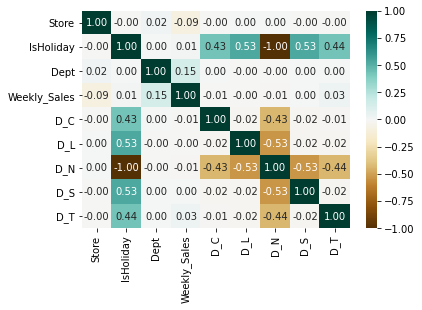

In [41]:
# Correlation map to ascertain features that have most correlation with each other.
sns.heatmap(trainf.corr(),annot =True,fmt=".2f",cmap="BrBG")

From the above map, it is evident that Dept has a strong correlation with weekly sales making it a very good feature to have

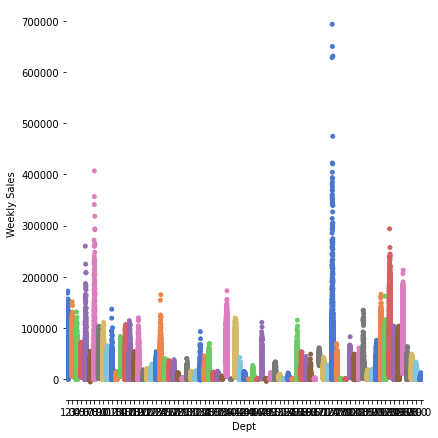

In [42]:
# Explore SibSp feature vs Survived
g = sns.catplot(x="Dept",y="Weekly_Sales",data=trainf,kind="strip", height = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Weekly Sales")

In [43]:
trainf.Dept.unique()
# We have a total of 80 dept, Thus The congestion in the x-axis. This still proves how this is feature holds much weight

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 40., 41.,
       42., 44., 45., 46., 47., 48., 49., 51., 52., 54., 55., 56., 58.,
       59., 60., 67., 71., 72., 74., 77., 78., 79., 80., 81., 82., 83.,
       85., 87., 90., 91., 92., 93., 94., 95., 96., 97., 98., 99., 39.,
       50., 43., 65.])

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'IsHoliday'}>,
        <AxesSubplot:title={'center':'Dept'}>],
       [<AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'D_C'}>,
        <AxesSubplot:title={'center':'D_L'}>],
       [<AxesSubplot:title={'center':'D_N'}>,
        <AxesSubplot:title={'center':'D_S'}>,
        <AxesSubplot:title={'center':'D_T'}>]], dtype=object)

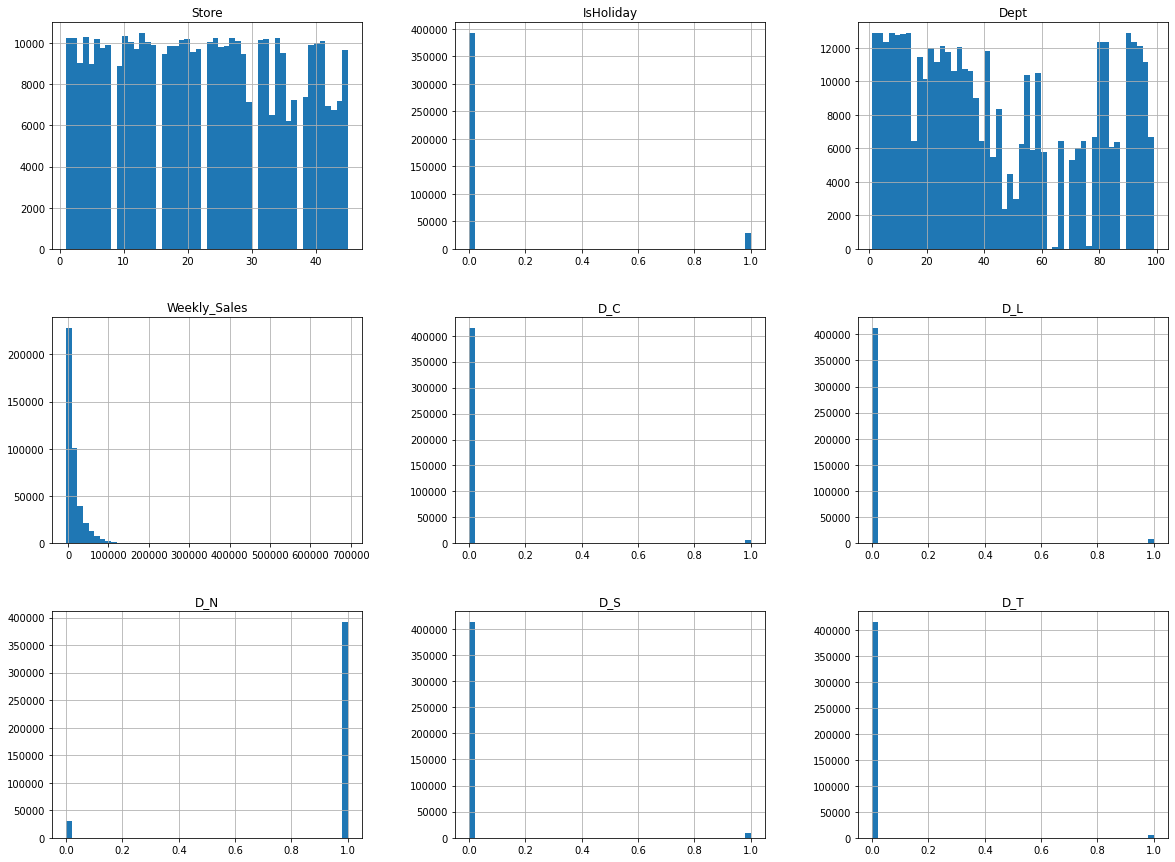

In [44]:
# Lets plot a hist and see the correlation of each attribute more closely
#%matplotlib inline not specified
trainf.hist(bins=50, figsize=(20,15))

In [45]:
# Lets now chose a model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


#### The Linear Regression Model

## Lets split our training set into sample train test and validation test.
#### Later after we are satisfied that our model is upto the task, we can now use the test set.

In [46]:
## We can define our own function, but since sklearn comes loaded, lets use its already defined method
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(trainf, test_size=0.2, random_state=42)

In [47]:
# data our model will be trained and validated with prior to testing it on the actual test set
train_1 = train_set.drop("Weekly_Sales", axis=1)
train_labels = train_set["Weekly_Sales"].copy()

## Model Selection

In [48]:
# Instantiate our model and train it on the validation set
lin_reg = LinearRegression()
lin_reg.fit(train_1, train_labels)

LinearRegression()

In [49]:
#  Let’s try it out on a few instances from the validation set:
some_data = train_1.iloc[:5]
some_labels = train_labels.iloc[:5]

In [50]:
# Lets get some predictions
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [12420.       12528.       16512.015625 16620.015625 16820.390625]
Labels: [7490.24, 48.25, 1262.75, 8722.34, 15247.36]


### Our Linear Regression Model seem to perfom worse, it might be underfitting the data and additional features need to be included

In [51]:
# prepare the validation test set
test_1 = test_set.drop("Weekly_Sales", axis=1)
# this is to ensure train label is of same size as the test set
train_labels_custom = train_labels[:84314]

In [52]:
### Let’s measure this regression model’s RMSE on the whole validation set using Scikit-Learn’s mean_squared_error function:
sales_predictions = lin_reg.predict(test_1)
lin_mse = mean_squared_error(train_labels_custom, sales_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


22910.9840574324

In [53]:
trainf.Weekly_Sales.mean()

15981.25812346704

#### Considering the mean to be 15,981, a prediction error of 22910 is not very satisfying

### Decision Tree Regressor

In [54]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_1, train_labels)

DecisionTreeRegressor()

In [55]:
 ### Since the modelis trained, lets evaluate it on the validation test
sales_predictions = tree_reg.predict(test_1)
tree_mse = mean_squared_error(train_labels_custom, sales_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


31556.82199021385

## This Decision Tree perfomes worse than our linear regression model

#### Lets use cross validation and see what effect this has on the model

In [56]:
scores = cross_val_score(tree_reg, test_1, train_labels_custom,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([24036.50333301, 24499.29896775, 24354.28661575, 23357.74768677,
       23993.34564605, 23945.09856103, 24254.29690243, 23517.96297922,
       22817.56935685, 23998.44992546])

In [57]:
# Results
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [58]:
display_scores(tree_rmse_scores)

Scores: [24036.50333301 24499.29896775 24354.28661575 23357.74768677
 23993.34564605 23945.09856103 24254.29690243 23517.96297922
 22817.56935685 23998.44992546]
Mean: 23877.455997430316
Standard deviation: 483.3940781409989


In [59]:
scores = cross_val_score(lin_reg, test_1, train_labels_custom,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [60]:
display_scores(lin_rmse_scores)

Scores: [22349.26073207 23713.85960536 22774.61097579 22131.08134406
 22593.41977435 22875.28793011 22892.19672463 22251.68686519
 21246.04407265 22809.26223992]
Mean: 22563.671026413493
Standard deviation: 608.2963261691955


# Its evident the DecisionTree is overfitting hence its bad perfomance

In [61]:
## RandomForest
forest_reg = RandomForestRegressor()
forest_reg.fit(train_1, train_labels)

RandomForestRegressor()

In [62]:
sales_predictions = forest_reg.predict(test_1)
forest_mse = mean_squared_error(train_labels_custom, sales_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

31542.80152191642

In [63]:
scores = cross_val_score(forest_reg, test_1, train_labels_custom,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [64]:
display_scores(forest_rmse_scores)

Scores: [23136.2917506  24246.31585341 23452.18014833 22786.21065654
 23304.2097064  23505.39234624 23671.57944663 22979.7604456
 21989.57362419 23460.69384701]
Mean: 23253.220782496286
Standard deviation: 566.8719091814557


### It is evident that features we are working with are fewer and thus our models are overfitting, we therefore need more features for our models to perform better.

### From the results above we can confidently chose the Linear Regression Model since its perfomance is better by a small margin.

#### However our training set ought to have more features for our model to generalise well and thus perform better.

In [65]:
# We choose the Linear Regression Model and test it against the actual test set ()
train_final = trainf.drop("Weekly_Sales", axis=1)
train_labels = trainf["Weekly_Sales"].copy()
scores_final = cross_val_score(lin_reg, train_final, train_labels,scoring="neg_mean_squared_error", cv=10)

In [66]:
# Lets Check its perfomance.
rmse_scores = np.sqrt(-scores_final)
display_scores(rmse_scores)

Scores: [29006.70718393 18765.07344436 25064.58063514 26367.94614224
 24926.30793067 19801.82425585 21822.88482758 19134.78907837
 18236.13980737 18620.01814828]
Mean: 22174.627145379585
Standard deviation: 3673.5723204827445


### Without Inclusion of enough features our conclusion on which model perfomes better might be biased due to overfitting or underfitting cases , our 'best' model is doomed to perform poorly

In [67]:
# Lets Predict Sales in the test set
predictions = lin_reg.predict(testf)

In [68]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [69]:
# We now need to reconvert our hashed date formats to their original value for submission purposes.
sampleSubmission['Weekly_Sales'] = predictions
column_date = test.Date
sampleSubmission['Date'] = column_date
#hashed_date = testf.Date
#sampleSubmission['H_Date'] = hashed_date
sampleSubmission['Id'] = test['Store'].astype(str) + '_' +  test['Dept'].astype(str) + '_' +  sampleSubmission['Date'].astype(str)
sampleSubmission = sampleSubmission[['Id','Weekly_Sales']]

In [70]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,14390.15625
1,1_1_2012-11-09,14390.15625
2,1_1_2012-11-16,14390.15625
3,1_1_2012-11-23,20250.68750
4,1_1_2012-11-30,14390.15625


In [71]:
sampleSubmission.to_csv('output.csv', index=False)

### Later I intend to equip all the models with sufficient features and see the difference in model perfomances